In [1]:
import csv
import numpy as np 
import matplotlib.pyplot as plt 
# import scipy.optimize
from matplotlib.ticker import FormatStrFormatter

def read_ads(filename='', skip=95):
    data = []
    with open(filename, 'rt') as file:
        reader = csv.reader(x.replace('\0', '') for x in file)

        # skip header
        for idx in range(skip):
            next(reader)

        for row in reader:
            temp_data = []
            for item in row:
                temp_data.append(float(item))
            data.append(temp_data)
    return np.array(data)

# tacrolimus_data = read_ads('Pyridine Tacrolimus.csv')
# oxalate_data = read_ads('Oxalate.csv')

In [3]:
frequencies = tacrolimus_data[:,0]
pure_pyridine = np.mean(tacrolimus_data[:,5:], axis=1)
pure_pyridine_std = np.std(tacrolimus_data[:,5:], axis=1, ddof=1)
tacrolimus = np.mean(tacrolimus_data[:,3:5], axis=1)
tacrolimus_std = np.std(tacrolimus_data[:,3:5], axis=1, ddof=1)
# print(tacrolimus_data[:,1:4])

plt.figure(figsize=(10,6))
plt.title('Bode Plot for Tacrolimus Detection in Pyridine', fontsize=16)
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Impedance $|Z|$ ($\Omega$)', fontsize=14)
plt.plot(frequencies, pure_pyridine, color='cornflowerblue', label='Pyridine Baseline')
plt.fill_between(frequencies, pure_pyridine - pure_pyridine_std, pure_pyridine + pure_pyridine_std, color='cornflowerblue', alpha=0.3)
plt.plot(frequencies, tacrolimus, color='darkorange', label='Tacrolimus Saturation')
plt.fill_between(frequencies, tacrolimus - tacrolimus_std, tacrolimus + tacrolimus_std, color='darkorange', alpha=0.3)
plt.xscale('log')
plt.yscale('log')
ax = plt.gca()
ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=5)
ax.tick_params(which='minor', length=3)
plt.legend()
plt.savefig('Tacrolimus Dilution vs Baseline.png',dpi=300,bbox_inches='tight')
plt.show()

NameError: name 'tacrolimus_data' is not defined

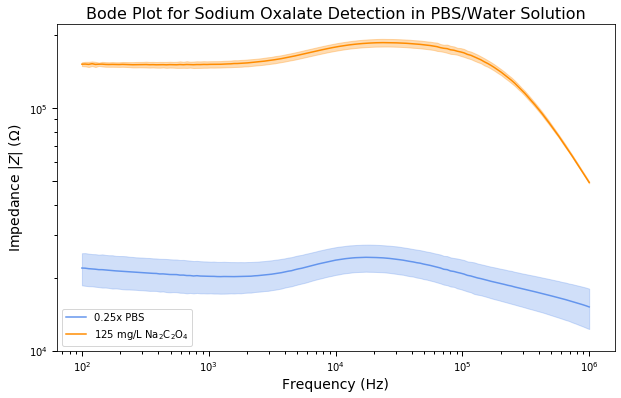

In [ ]:
frequencies = oxalate_data[:,0]
PBS_baseline = np.mean(oxalate_data[:,2:5], axis=1)
PBS_baseline_std = np.std(oxalate_data[:,2:5], axis=1, ddof=1)
oxalate_125 = np.mean(oxalate_data[:,5:], axis=1)
oxalate_125_std = np.std(oxalate_data[:,5:], axis=1, ddof=1)

plt.figure(figsize=(10,6))
plt.title('Bode Plot for Sodium Oxalate Detection in PBS/Water Solution', fontsize=16)
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Impedance $|Z|$ ($\Omega$)', fontsize=14)
plt.plot(frequencies, PBS_baseline, color='cornflowerblue', label='0.25x PBS')
plt.fill_between(frequencies, PBS_baseline - PBS_baseline_std, PBS_baseline + PBS_baseline_std, color='cornflowerblue', alpha=0.3)
plt.plot(frequencies, oxalate_125, color='darkorange', label='125 mg/L Na$_2$C$_2$O$_4$')
plt.fill_between(frequencies, oxalate_125 - oxalate_125_std, oxalate_125 + oxalate_125_std, color='darkorange', alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.legend()
ax = plt.gca()
ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=5)
ax.tick_params(which='minor', length=3)
ax.set_yticks([1e4, 0.5e5, 1e5]) # explicitly declare tick marks due to poor matplotlib formatting on log scale
# plt.grid()
plt.savefig('Oxalate Dilution vs Baseline.png',dpi=300,bbox_inches='tight')
plt.show()

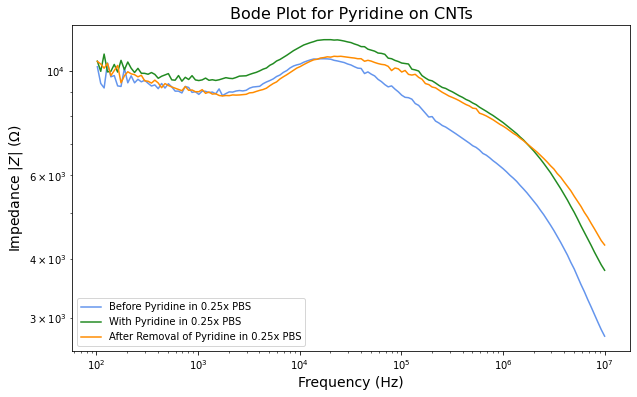

In [2]:
pyridine_isolation_raw = read_ads(r'D:\Local Documents\Research\Khalid\Functionalization Measurements\Tacrolimus\Pyridine Isolation 50-50.csv')
# print(pyridine_isolation_raw)

figpath = r'D:\Local Documents\Research\Khalid\Functionalization Measurements\Tacrolimus\\'

frequencies = pyridine_isolation_raw[:,0]
before = pyridine_isolation_raw[:,2]
during = np.mean([pyridine_isolation_raw[:,3],pyridine_isolation_raw[:,5]], axis=0)
during_std = np.std([pyridine_isolation_raw[:,3],pyridine_isolation_raw[:,5]], axis=0, ddof=1)
after = np.mean([pyridine_isolation_raw[:,1],pyridine_isolation_raw[:,4]], axis=0)
after_std = np.std([pyridine_isolation_raw[:,1],pyridine_isolation_raw[:,4]], axis=0, ddof=1) 

plt.figure(figsize=(10,6))
plt.title('Bode Plot for Pyridine on CNTs', fontsize=16)
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Impedance $|Z|$ ($\Omega$)', fontsize=14)
plt.plot(frequencies, before, color='cornflowerblue', label='Before Pyridine in 0.25x PBS')
plt.plot(frequencies, during, color='forestgreen', label='With Pyridine in 0.25x PBS')
# plt.fill_between(frequencies, during - during_std, during + during_std, color='forestgreen', alpha=0.3)
plt.plot(frequencies, after, color='darkorange', label='After Removal of Pyridine in 0.25x PBS')
# plt.fill_between(frequencies, after - after_std, after + after_std, color='darkorange', alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.legend()
# ax = plt.gca()
# ax.tick_params(which='both', width=1)
# ax.tick_params(which='major', length=5)
# ax.tick_params(which='minor', length=3)
# ax.set_yticks([1e4, 0.5e5, 1e5]) # explicitly declare tick marks due to poor matplotlib formatting on log scale
# plt.grid()
plt.savefig(figpath + 'Pyridine Attachment.png',dpi=300,bbox_inches='tight')
plt.show()

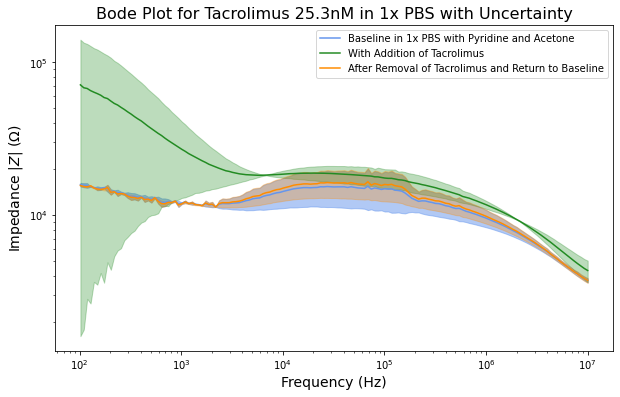

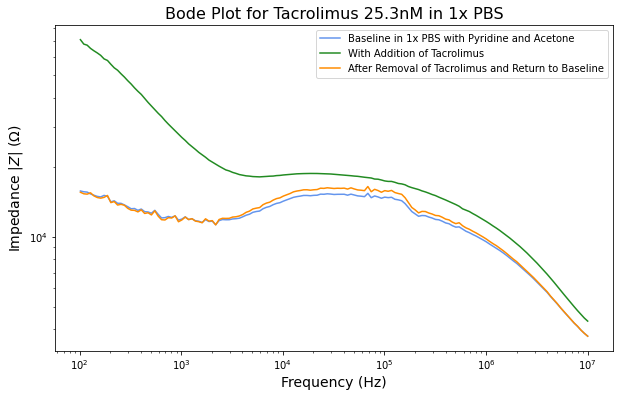

In [ ]:
tacrolimus_data = read_ads(r'D:\Local Documents\Research\Khalid\Functionalization Measurements\Tacrolimus\Tacrolimus 25.3 nM in PBS.csv', skip=127)
# print(pyridine_isolation_raw)

frequencies = tacrolimus_data[:,0]
before = np.mean([tacrolimus_data[:,3],tacrolimus_data[:,1]], axis=0)
before_std = np.std([tacrolimus_data[:,3],tacrolimus_data[:,1]], axis=0, ddof=1)
during = np.mean([tacrolimus_data[:,4],tacrolimus_data[:,5]], axis=0)
during_std = np.std([tacrolimus_data[:,4],tacrolimus_data[:,5]], axis=0, ddof=1)
after = np.mean([tacrolimus_data[:,1],tacrolimus_data[:,2],tacrolimus_data[:,-1]], axis=0)
after_std = np.std([tacrolimus_data[:,1],tacrolimus_data[:,2],tacrolimus_data[:,-1]], axis=0, ddof=1)


plt.figure(figsize=(10,6))
plt.title('Bode Plot for Tacrolimus 25.3nM in 1x PBS with Uncertainty', fontsize=16)
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Impedance $|Z|$ ($\Omega$)', fontsize=14)
plt.plot(frequencies, before, color='cornflowerblue', label='Baseline in 1x PBS with Pyridine and Acetone')
plt.fill_between(frequencies, before - before_std, before + before_std, color='cornflowerblue', alpha=0.5)
plt.plot(frequencies, during, color='forestgreen', label='With Addition of Tacrolimus')
plt.fill_between(frequencies, during - during_std, during + during_std, color='forestgreen', alpha=0.3)
plt.plot(frequencies, after, color='darkorange', label='After Removal of Tacrolimus and Return to Baseline')
plt.fill_between(frequencies, after - after_std, after + after_std, color='darkorange', alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.legend()
# ax = plt.gca()
# ax.tick_params(which='both', width=1)
# ax.tick_params(which='major', length=5)
# ax.tick_params(which='minor', length=3)
# ax.set_yticks([1e4, 0.5e5, 1e5]) # explicitly declare tick marks due to poor matplotlib formatting on log scale
# plt.grid()
plt.savefig(figpath + 'Tacrolimus 25.3nM in PBS with Uncertainty.png',dpi=300,bbox_inches='tight')
plt.show()

plt.figure(figsize=(10,6))
plt.title('Bode Plot for Tacrolimus 25.3nM in 1x PBS', fontsize=16)
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Impedance $|Z|$ ($\Omega$)', fontsize=14)
plt.plot(frequencies, before, color='cornflowerblue', label='Baseline in 1x PBS with Pyridine and Acetone')
# plt.fill_between(frequencies, before - before_std, before + before_std, color='cornflowerblue', alpha=0.5)
plt.plot(frequencies, during, color='forestgreen', label='With Addition of Tacrolimus')
# plt.fill_between(frequencies, during - during_std, during + during_std, color='forestgreen', alpha=0.3)
plt.plot(frequencies, after, color='darkorange', label='After Removal of Tacrolimus and Return to Baseline')
# plt.fill_between(frequencies, after - after_std, after + after_std, color='darkorange', alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.legend()
# ax = plt.gca()
# ax.tick_params(which='both', width=1)
# ax.tick_params(which='major', length=5)
# ax.tick_params(which='minor', length=3)
# ax.set_yticks([1e4, 0.5e5, 1e5]) # explicitly declare tick marks due to poor matplotlib formatting on log scale
# plt.grid()
plt.savefig(figpath + 'Tacrolimus 25.3nM in PBS.png',dpi=300,bbox_inches='tight')
plt.show()

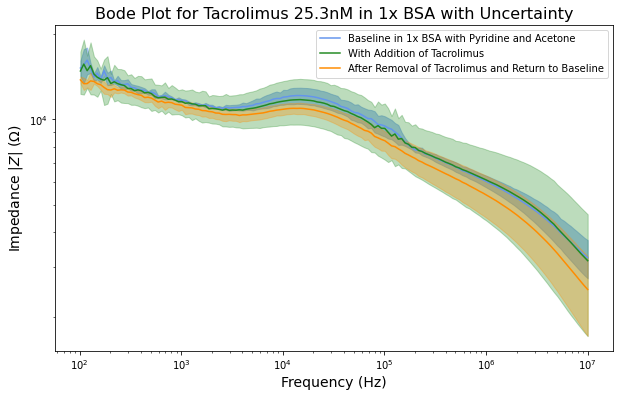

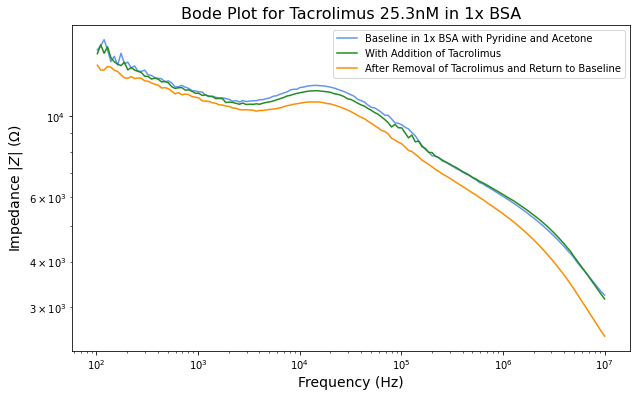

In [ ]:
tacrolimus_data = read_ads(r'D:\Local Documents\Research\Khalid\Functionalization Measurements\Tacrolimus\Tacrolimus 25.3 nM in Bov.csv', skip=159)
# print(pyridine_isolation_raw)

frequencies = tacrolimus_data[:,0]
before = np.mean([tacrolimus_data[:,4],tacrolimus_data[:,2],tacrolimus_data[:,8]], axis=0)
before_std = np.std([tacrolimus_data[:,4],tacrolimus_data[:,2],tacrolimus_data[:,8]], axis=0, ddof=1)
during = np.mean([tacrolimus_data[:,3],tacrolimus_data[:,6],tacrolimus_data[:,9]], axis=0)
during_std = np.std([tacrolimus_data[:,3],tacrolimus_data[:,6],tacrolimus_data[:,9]], axis=0, ddof=1)
after = np.mean([tacrolimus_data[:,1],tacrolimus_data[:,5],tacrolimus_data[:,7]], axis=0)
after_std = np.std([tacrolimus_data[:,1],tacrolimus_data[:,5],tacrolimus_data[:,7]], axis=0, ddof=1)


plt.figure(figsize=(10,6))
plt.title('Bode Plot for Tacrolimus 25.3nM in 1x BSA with Uncertainty', fontsize=16)
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Impedance $|Z|$ ($\Omega$)', fontsize=14)
plt.plot(frequencies, before, color='cornflowerblue', label='Baseline in 1x BSA with Pyridine and Acetone')
plt.fill_between(frequencies, before - before_std, before + before_std, color='cornflowerblue', alpha=0.5)
plt.plot(frequencies, during, color='forestgreen', label='With Addition of Tacrolimus')
plt.fill_between(frequencies, during - during_std, during + during_std, color='forestgreen', alpha=0.3)
plt.plot(frequencies, after, color='darkorange', label='After Removal of Tacrolimus and Return to Baseline')
plt.fill_between(frequencies, after - after_std, after + after_std, color='darkorange', alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig(figpath + 'Tacrolimus 25.3nM in BSA with Uncertainty.png',dpi=300,bbox_inches='tight')
plt.show()

plt.figure(figsize=(10,6))
plt.title('Bode Plot for Tacrolimus 25.3nM in 1x BSA', fontsize=16)
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Impedance $|Z|$ ($\Omega$)', fontsize=14)
plt.plot(frequencies, before, color='cornflowerblue', label='Baseline in 1x BSA with Pyridine and Acetone')
# plt.fill_between(frequencies, before - before_std, before + before_std, color='cornflowerblue', alpha=0.5)
plt.plot(frequencies, during, color='forestgreen', label='With Addition of Tacrolimus')
# plt.fill_between(frequencies, during - during_std, during + during_std, color='forestgreen', alpha=0.3)
plt.plot(frequencies, after, color='darkorange', label='After Removal of Tacrolimus and Return to Baseline')
# plt.fill_between(frequencies, after - after_std, after + after_std, color='darkorange', alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig(figpath + 'Tacrolimus 25.3nM in BSA.png',dpi=300,bbox_inches='tight')
plt.show()

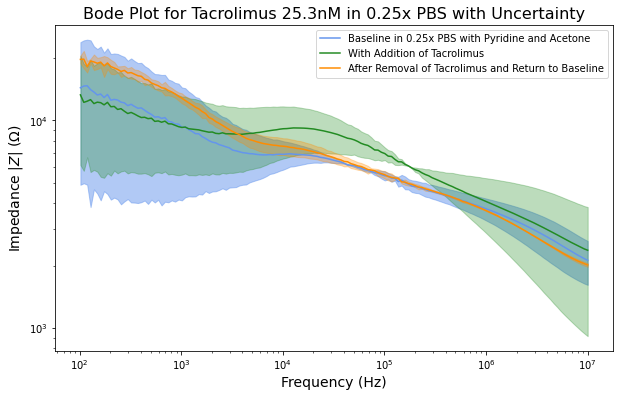

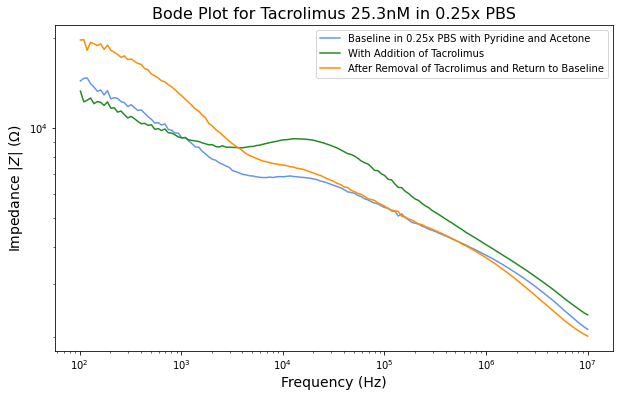

In [ ]:
tacrolimus_data = read_ads(r'D:\Local Documents\Research\Khalid\Functionalization Measurements\Tacrolimus\Tacrolimus 25.3 nM in 0.25x PBS.csv', skip=111)
# print(pyridine_isolation_raw)

frequencies = tacrolimus_data[:,0]
before = np.mean([tacrolimus_data[:,2],tacrolimus_data[:,5]], axis=0)
before_std = np.std([tacrolimus_data[:,2],tacrolimus_data[:,5]], axis=0, ddof=1)
during = np.mean([tacrolimus_data[:,3],tacrolimus_data[:,6]], axis=0)
during_std = np.std([tacrolimus_data[:,3],tacrolimus_data[:,6]], axis=0, ddof=1)
after = np.mean([tacrolimus_data[:,1],tacrolimus_data[:,4]], axis=0)
after_std = np.std([tacrolimus_data[:,1],tacrolimus_data[:,4]], axis=0, ddof=1)


plt.figure(figsize=(10,6))
plt.title('Bode Plot for Tacrolimus 25.3nM in 0.25x PBS with Uncertainty', fontsize=16)
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Impedance $|Z|$ ($\Omega$)', fontsize=14)
plt.plot(frequencies, before, color='cornflowerblue', label='Baseline in 0.25x PBS with Pyridine and Acetone')
plt.fill_between(frequencies, before - before_std, before + before_std, color='cornflowerblue', alpha=0.5)
plt.plot(frequencies, during, color='forestgreen', label='With Addition of Tacrolimus')
plt.fill_between(frequencies, during - during_std, during + during_std, color='forestgreen', alpha=0.3)
plt.plot(frequencies, after, color='darkorange', label='After Removal of Tacrolimus and Return to Baseline')
plt.fill_between(frequencies, after - after_std, after + after_std, color='darkorange', alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig(figpath + 'Tacrolimus 25.3nM in 0.25x PBS with Uncertainty.png',dpi=300,bbox_inches='tight')
plt.show()

plt.figure(figsize=(10,6))
plt.title('Bode Plot for Tacrolimus 25.3nM in 0.25x PBS', fontsize=16)
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Impedance $|Z|$ ($\Omega$)', fontsize=14)
plt.plot(frequencies, before, color='cornflowerblue', label='Baseline in 0.25x PBS with Pyridine and Acetone')
# plt.fill_between(frequencies, before - before_std, before + before_std, color='cornflowerblue', alpha=0.5)
plt.plot(frequencies, during, color='forestgreen', label='With Addition of Tacrolimus')
# plt.fill_between(frequencies, during - during_std, during + during_std, color='forestgreen', alpha=0.3)
plt.plot(frequencies, after, color='darkorange', label='After Removal of Tacrolimus and Return to Baseline')
# plt.fill_between(frequencies, after - after_std, after + after_std, color='darkorange', alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig(figpath + 'Tacrolimus 25.3nM in 0.25x PBS.png',dpi=300,bbox_inches='tight')
plt.show()

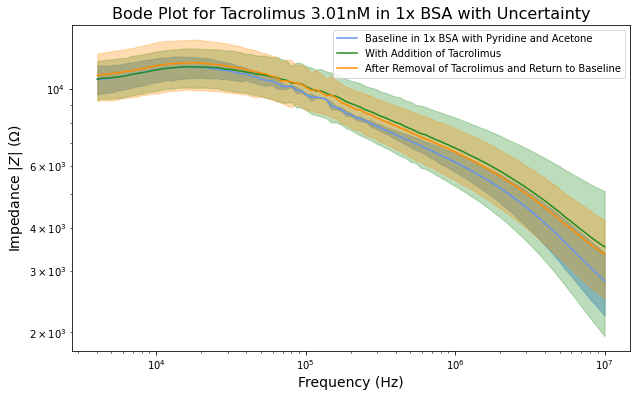

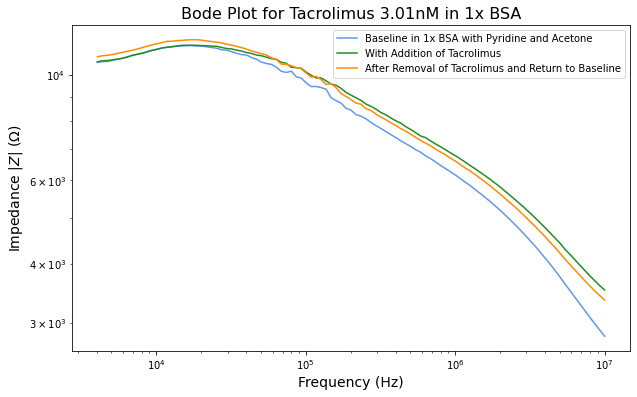

In [ ]:
tacrolimus_data = read_ads(r'D:\Local Documents\Research\Khalid\Functionalization Measurements\Tacrolimus\Tacrolimus 3.01 nM in Bov.csv', skip=159)
# print(pyridine_isolation_raw)

frequencies = tacrolimus_data[:,0]
before = np.mean([tacrolimus_data[:,5],tacrolimus_data[:,2]], axis=0)
before_std = np.std([tacrolimus_data[:,5],tacrolimus_data[:,2]], axis=0, ddof=1)
during = np.mean([tacrolimus_data[:,3],tacrolimus_data[:,6]], axis=0)
during_std = np.std([tacrolimus_data[:,3],tacrolimus_data[:,6]], axis=0, ddof=1)
after = np.mean([tacrolimus_data[:,1],tacrolimus_data[:,4]], axis=0)
after_std = np.std([tacrolimus_data[:,1],tacrolimus_data[:,4]], axis=0, ddof=1)


plt.figure(figsize=(10,6))
plt.title('Bode Plot for Tacrolimus 3.01nM in 1x BSA with Uncertainty', fontsize=16)
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Impedance $|Z|$ ($\Omega$)', fontsize=14)
plt.plot(frequencies, before, color='cornflowerblue', label='Baseline in 1x BSA with Pyridine and Acetone')
plt.fill_between(frequencies, before - before_std, before + before_std, color='cornflowerblue', alpha=0.5)
plt.plot(frequencies, during, color='forestgreen', label='With Addition of Tacrolimus')
plt.fill_between(frequencies, during - during_std, during + during_std, color='forestgreen', alpha=0.3)
plt.plot(frequencies, after, color='darkorange', label='After Removal of Tacrolimus and Return to Baseline')
plt.fill_between(frequencies, after - after_std, after + after_std, color='darkorange', alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig(figpath + 'Tacrolimus 3.01nM in BSA with Uncertainty.png',dpi=300,bbox_inches='tight')
plt.show()

plt.figure(figsize=(10,6))
plt.title('Bode Plot for Tacrolimus 3.01nM in 1x BSA', fontsize=16)
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Impedance $|Z|$ ($\Omega$)', fontsize=14)
plt.plot(frequencies, before, color='cornflowerblue', label='Baseline in 1x BSA with Pyridine and Acetone')
# plt.fill_between(frequencies, before - before_std, before + before_std, color='cornflowerblue', alpha=0.5)
plt.plot(frequencies, during, color='forestgreen', label='With Addition of Tacrolimus')
# plt.fill_between(frequencies, during - during_std, during + during_std, color='forestgreen', alpha=0.3)
plt.plot(frequencies, after, color='darkorange', label='After Removal of Tacrolimus and Return to Baseline')
# plt.fill_between(frequencies, after - after_std, after + after_std, color='darkorange', alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig(figpath + 'Tacrolimus 3.01nM in BSA.png',dpi=300,bbox_inches='tight')
plt.show()

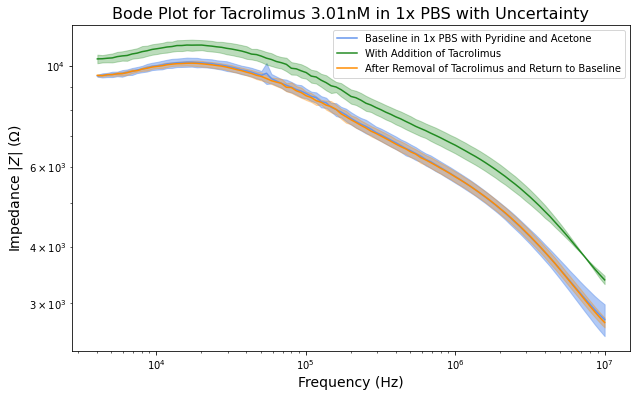

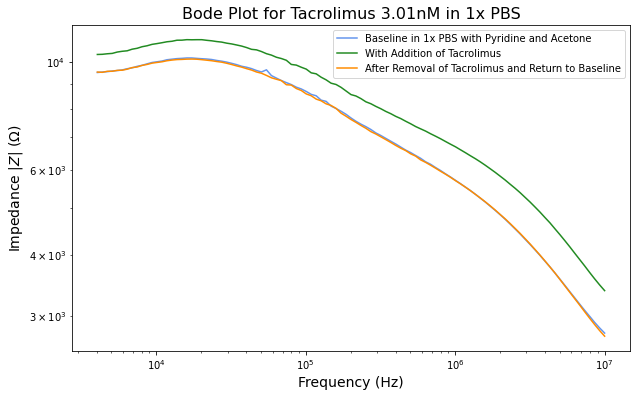

In [ ]:
tacrolimus_data = read_ads(r'D:\Local Documents\Research\Khalid\Functionalization Measurements\Tacrolimus\Tacrolimus 3.01 nM in PBS.csv', skip=159)
# print(pyridine_isolation_raw)

frequencies = tacrolimus_data[:,0]
before = np.mean([tacrolimus_data[:,5],tacrolimus_data[:,2]], axis=0)
before_std = np.std([tacrolimus_data[:,5],tacrolimus_data[:,2]], axis=0, ddof=1)
during = np.mean([tacrolimus_data[:,4],tacrolimus_data[:,6]], axis=0)
during_std = np.std([tacrolimus_data[:,4],tacrolimus_data[:,6]], axis=0, ddof=1)
after = np.mean([tacrolimus_data[:,1],tacrolimus_data[:,3]], axis=0)
after_std = np.std([tacrolimus_data[:,1],tacrolimus_data[:,3]], axis=0, ddof=1)


plt.figure(figsize=(10,6))
plt.title('Bode Plot for Tacrolimus 3.01nM in 1x PBS with Uncertainty', fontsize=16)
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Impedance $|Z|$ ($\Omega$)', fontsize=14)
plt.plot(frequencies, before, color='cornflowerblue', label='Baseline in 1x PBS with Pyridine and Acetone')
plt.fill_between(frequencies, before - before_std, before + before_std, color='cornflowerblue', alpha=0.5)
plt.plot(frequencies, during, color='forestgreen', label='With Addition of Tacrolimus')
plt.fill_between(frequencies, during - during_std, during + during_std, color='forestgreen', alpha=0.3)
plt.plot(frequencies, after, color='darkorange', label='After Removal of Tacrolimus and Return to Baseline')
plt.fill_between(frequencies, after - after_std, after + after_std, color='darkorange', alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig(figpath + 'Tacrolimus 3.01nM in PBS with Uncertainty.png',dpi=300,bbox_inches='tight')
plt.show()

plt.figure(figsize=(10,6))
plt.title('Bode Plot for Tacrolimus 3.01nM in 1x PBS', fontsize=16)
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Impedance $|Z|$ ($\Omega$)', fontsize=14)
plt.plot(frequencies, before, color='cornflowerblue', label='Baseline in 1x PBS with Pyridine and Acetone')
# plt.fill_between(frequencies, before - before_std, before + before_std, color='cornflowerblue', alpha=0.5)
plt.plot(frequencies, during, color='forestgreen', label='With Addition of Tacrolimus')
# plt.fill_between(frequencies, during - during_std, during + during_std, color='forestgreen', alpha=0.3)
plt.plot(frequencies, after, color='darkorange', label='After Removal of Tacrolimus and Return to Baseline')
# plt.fill_between(frequencies, after - after_std, after + after_std, color='darkorange', alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig(figpath + 'Tacrolimus 3.01nM in PBS.png',dpi=300,bbox_inches='tight')
plt.show()

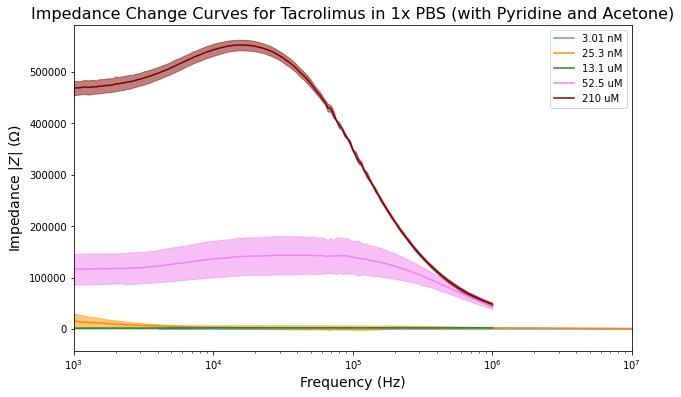

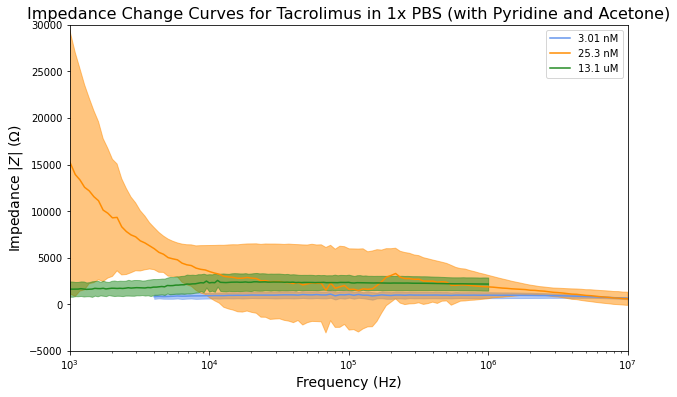

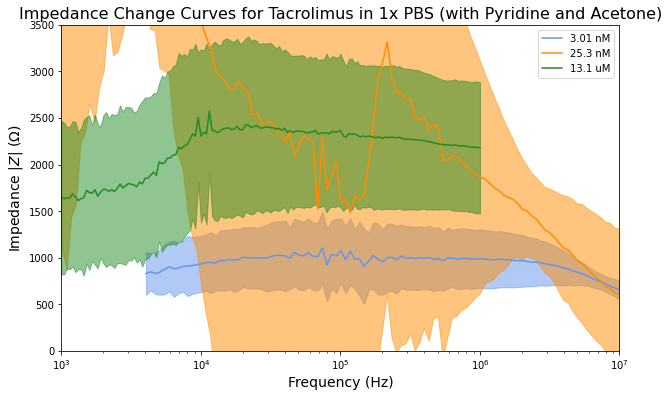

In [4]:
tacrolimus_data = read_ads(r'D:\Local Documents\Research\Khalid\Functionalization Measurements\Tacrolimus\Tacrolimus 3.01 nM in PBS.csv', skip=159)
frequencies_301 = tacrolimus_data[:,0]
before = np.mean([tacrolimus_data[:,5],tacrolimus_data[:,2]], axis=0)
before_std = np.std([tacrolimus_data[:,5],tacrolimus_data[:,2]], axis=0, ddof=1)
during = np.mean([tacrolimus_data[:,4],tacrolimus_data[:,6]], axis=0)
during_std = np.std([tacrolimus_data[:,4],tacrolimus_data[:,6]], axis=0, ddof=1)
after = np.mean([tacrolimus_data[:,1],tacrolimus_data[:,3]], axis=0)
after_std = np.std([tacrolimus_data[:,1],tacrolimus_data[:,3]], axis=0, ddof=1)
Delta_301 = during - after
Delta_301_std = np.sqrt(during_std**2 + after_std**2)

tacrolimus_data = read_ads(r'D:\Local Documents\Research\Khalid\Functionalization Measurements\Tacrolimus\Tacrolimus 25.3 nM in PBS.csv', skip=127)
frequencies_253 = tacrolimus_data[:,0]
before = np.mean([tacrolimus_data[:,3],tacrolimus_data[:,1]], axis=0)
before_std = np.std([tacrolimus_data[:,3],tacrolimus_data[:,1]], axis=0, ddof=1)
during = np.mean([tacrolimus_data[:,4],tacrolimus_data[:,5]], axis=0)
during_std = np.std([tacrolimus_data[:,4],tacrolimus_data[:,5]], axis=0, ddof=1)
after = np.mean([tacrolimus_data[:,1],tacrolimus_data[:,2],tacrolimus_data[:,-1]], axis=0)
after_std = np.std([tacrolimus_data[:,1],tacrolimus_data[:,2],tacrolimus_data[:,-1]], axis=0, ddof=1)
Delta_253 = during - after
Delta_253_std = np.sqrt(during_std**2 + after_std**2)

tacrolimus_data = read_ads(r'D:\Local Documents\Research\Khalid\Functionalization Measurements\Tacrolimus\1_3 Tacrolimus.csv', skip=143)
frequencies_210 = tacrolimus_data[:,0]
during = np.mean([tacrolimus_data[:,3],tacrolimus_data[:,4],tacrolimus_data[:,5]], axis=0)
during_std = np.std([tacrolimus_data[:,3],tacrolimus_data[:,4],tacrolimus_data[:,5]], axis=0, ddof=1)
after = np.mean([tacrolimus_data[:,7],tacrolimus_data[:,8]], axis=0)
after_std = np.std([tacrolimus_data[:,7],tacrolimus_data[:,8]], axis=0, ddof=1)
Delta_210 = during - after
Delta_210_std = np.sqrt(during_std**2 + after_std**2)

tacrolimus_data = read_ads(r'D:\Local Documents\Research\Khalid\Functionalization Measurements\Tacrolimus\1_16 Tacrolimus.csv', skip=143)
frequencies_525 = tacrolimus_data[:,0]
during = np.mean([tacrolimus_data[:,3],tacrolimus_data[:,4],tacrolimus_data[:,5]], axis=0)
during_std = np.std([tacrolimus_data[:,3],tacrolimus_data[:,4],tacrolimus_data[:,5]], axis=0, ddof=1)
after = np.mean([tacrolimus_data[:,7],tacrolimus_data[:,8]], axis=0)
after_std = np.std([tacrolimus_data[:,7],tacrolimus_data[:,8]], axis=0, ddof=1)
Delta_525 = after - during
Delta_525_std = np.sqrt(during_std**2 + after_std**2)

tacrolimus_data = read_ads(r'D:\Local Documents\Research\Khalid\Functionalization Measurements\Tacrolimus\1_64 Tacrolimus.csv', skip=62)
frequencies_131 = tacrolimus_data[:,0]
during = tacrolimus_data[:,1]
# during_std = np.std([tacrolimus_data[:,3],tacrolimus_data[:,4],tacrolimus_data[:,5]], axis=0, ddof=1)
after = np.mean([tacrolimus_data[:,2],tacrolimus_data[:,3]], axis=0)
after_std = np.std([tacrolimus_data[:,2],tacrolimus_data[:,3]], axis=0, ddof=1)
Delta_131 = after - during
Delta_131_std = after_std


plt.figure(figsize=(10,6))
plt.title('Impedance Change Curves for Tacrolimus in 1x PBS (with Pyridine and Acetone)', fontsize=16)
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Impedance $|Z|$ ($\Omega$)', fontsize=14)
plt.plot(frequencies_301, Delta_301, color='cornflowerblue', label='3.01 nM')
plt.plot(frequencies_253, Delta_253, color='darkorange', label='25.3 nM')
plt.plot(frequencies_131, Delta_131, color='forestgreen', label='13.1 uM')
plt.plot(frequencies_525, Delta_525, color='violet', label='52.5 uM')
plt.plot(frequencies_210, Delta_210, color='maroon', label='210 uM')
plt.xscale('log')
# plt.yscale('symlog')
plt.xlim([10**3, 10**7])
# plt.ylim([-5000, 12000])
plt.legend()
plt.savefig(figpath + 'Tacrolimus Over Concentration in PBS.png',dpi=300,bbox_inches='tight')

plt.fill_between(frequencies_301, Delta_301 - Delta_301_std, Delta_301 + Delta_301_std, color='cornflowerblue', alpha=0.5)
plt.fill_between(frequencies_253, Delta_253 - Delta_253_std, Delta_253 + Delta_253_std, color='darkorange', alpha=0.5)
plt.fill_between(frequencies_131, Delta_131 - Delta_131_std, Delta_131 + Delta_131_std, color='forestgreen', alpha=0.5)
plt.fill_between(frequencies_525, Delta_525 - Delta_525_std, Delta_525 + Delta_525_std, color='violet', alpha=0.5)
plt.fill_between(frequencies_210, Delta_210 - Delta_210_std, Delta_210 + Delta_210_std, color='maroon', alpha=0.5)
plt.savefig(figpath + 'Tacrolimus Over Concentration in PBS with Unc.png',dpi=300,bbox_inches='tight')
plt.show()

plt.figure(figsize=(10,6))
plt.title('Impedance Change Curves for Tacrolimus in 1x PBS (with Pyridine and Acetone)', fontsize=16)
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Impedance $|Z|$ ($\Omega$)', fontsize=14)
plt.plot(frequencies_301, Delta_301, color='cornflowerblue', label='3.01 nM')
plt.plot(frequencies_253, Delta_253, color='darkorange', label='25.3 nM')
plt.plot(frequencies_131, Delta_131, color='forestgreen', label='13.1 uM')
# plt.plot(frequencies_525, Delta_525, color='violet', label='52.5 uM')
# plt.plot(frequencies_210, Delta_210, color='maroon', label='210 uM')
plt.xscale('log')
# plt.yscale('symlog')
plt.xlim([10**3, 10**7])
plt.ylim([-5000, 30000])
plt.legend()
plt.savefig(figpath + 'Tacrolimus Over Concentration in PBS Zoomed.png',dpi=300,bbox_inches='tight')

plt.fill_between(frequencies_301, Delta_301 - Delta_301_std, Delta_301 + Delta_301_std, color='cornflowerblue', alpha=0.5)
plt.fill_between(frequencies_253, Delta_253 - Delta_253_std, Delta_253 + Delta_253_std, color='darkorange', alpha=0.5)
plt.fill_between(frequencies_131, Delta_131 - Delta_131_std, Delta_131 + Delta_131_std, color='forestgreen', alpha=0.5)
# plt.fill_between(frequencies_525, Delta_525 - Delta_525_std, Delta_525 + Delta_525_std, color='violet', alpha=0.5)
# plt.fill_between(frequencies_210, Delta_210 - Delta_210_std, Delta_210 + Delta_210_std, color='maroon', alpha=0.5)
plt.savefig(figpath + 'Tacrolimus Over Concentration in PBS with Unc Zoomed.png',dpi=300,bbox_inches='tight')
plt.show()

plt.figure(figsize=(10,6))
plt.title('Impedance Change Curves for Tacrolimus in 1x PBS (with Pyridine and Acetone)', fontsize=16)
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Impedance $|Z|$ ($\Omega$)', fontsize=14)
plt.plot(frequencies_301, Delta_301, color='cornflowerblue', label='3.01 nM')
plt.plot(frequencies_253, Delta_253, color='darkorange', label='25.3 nM')
plt.plot(frequencies_131, Delta_131, color='forestgreen', label='13.1 uM')
# plt.plot(frequencies_525, Delta_525, color='violet', label='52.5 uM')
# plt.plot(frequencies_210, Delta_210, color='maroon', label='210 uM')
plt.xscale('log')
# plt.yscale('symlog')
plt.xlim([10**3, 10**7])
plt.ylim([0, 3500])
plt.legend()
plt.savefig(figpath + 'Tacrolimus Over Concentration in PBS Zoomed 2x.png',dpi=300,bbox_inches='tight')

plt.fill_between(frequencies_301, Delta_301 - Delta_301_std, Delta_301 + Delta_301_std, color='cornflowerblue', alpha=0.5)
plt.fill_between(frequencies_253, Delta_253 - Delta_253_std, Delta_253 + Delta_253_std, color='darkorange', alpha=0.5)
plt.fill_between(frequencies_131, Delta_131 - Delta_131_std, Delta_131 + Delta_131_std, color='forestgreen', alpha=0.5)
# plt.fill_between(frequencies_525, Delta_525 - Delta_525_std, Delta_525 + Delta_525_std, color='violet', alpha=0.5)
# plt.fill_between(frequencies_210, Delta_210 - Delta_210_std, Delta_210 + Delta_210_std, color='maroon', alpha=0.5)
plt.savefig(figpath + 'Tacrolimus Over Concentration in PBS with Unc Zoomed 2x.png',dpi=300,bbox_inches='tight')
plt.show()

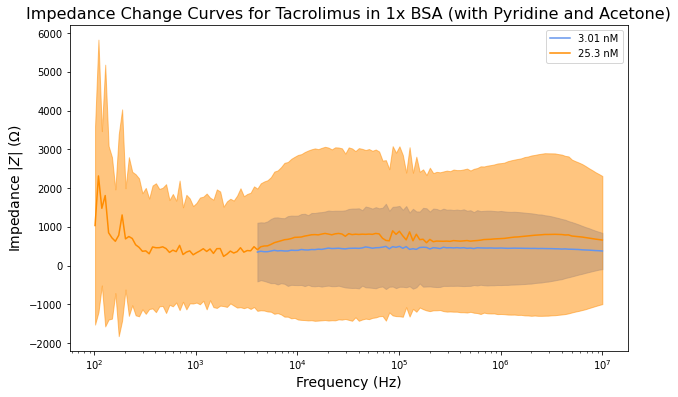

In [51]:
tacrolimus_data = read_ads(r'D:\Local Documents\Research\Khalid\Functionalization Measurements\Tacrolimus\Tacrolimus 3.01 nM in PBS.csv', skip=159)
frequencies_301 = tacrolimus_data[:,0]
before = np.mean([tacrolimus_data[:,5],tacrolimus_data[:,2]], axis=0)
before_std = np.std([tacrolimus_data[:,5],tacrolimus_data[:,2]], axis=0, ddof=1)
during = np.mean([tacrolimus_data[:,4],tacrolimus_data[:,6]], axis=0)
during_std = np.std([tacrolimus_data[:,4],tacrolimus_data[:,6]], axis=0, ddof=1)
after = np.mean([tacrolimus_data[:,1],tacrolimus_data[:,4]], axis=0)
after_std = np.std([tacrolimus_data[:,1],tacrolimus_data[:,4]], axis=0, ddof=1)
Delta_301 = during - after
Delta_301_std = np.sqrt(during_std**2 + after_std**2)

tacrolimus_data = read_ads(r'D:\Local Documents\Research\Khalid\Functionalization Measurements\Tacrolimus\Tacrolimus 25.3 nM in Bov.csv', skip=159)
frequencies_253 = tacrolimus_data[:,0]
before = np.mean([tacrolimus_data[:,4],tacrolimus_data[:,2],tacrolimus_data[:,8]], axis=0)
before_std = np.std([tacrolimus_data[:,4],tacrolimus_data[:,2],tacrolimus_data[:,8]], axis=0, ddof=1)
during = np.mean([tacrolimus_data[:,3],tacrolimus_data[:,6],tacrolimus_data[:,9]], axis=0)
during_std = np.std([tacrolimus_data[:,3],tacrolimus_data[:,6],tacrolimus_data[:,9]], axis=0, ddof=1)
after = np.mean([tacrolimus_data[:,1],tacrolimus_data[:,5],tacrolimus_data[:,7]], axis=0)
after_std = np.std([tacrolimus_data[:,1],tacrolimus_data[:,5],tacrolimus_data[:,7]], axis=0, ddof=1)
Delta_253 = during - after
Delta_253_std = np.sqrt(during_std**2 + after_std**2)


plt.figure(figsize=(10,6))
plt.title('Impedance Change Curves for Tacrolimus in 1x BSA (with Pyridine and Acetone)', fontsize=16)
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Impedance $|Z|$ ($\Omega$)', fontsize=14)
plt.plot(frequencies_301, Delta_301, color='cornflowerblue', label='3.01 nM')
plt.plot(frequencies_253, Delta_253, color='darkorange', label='25.3 nM')
plt.xscale('log')
# plt.yscale('symlog')
plt.legend()
plt.savefig(figpath + 'Tacrolimus Over Concentration in BSA.png',dpi=300,bbox_inches='tight')

plt.fill_between(frequencies_301, Delta_301 - Delta_301_std, Delta_301 + Delta_301_std, color='cornflowerblue', alpha=0.5)
plt.fill_between(frequencies_253, Delta_253 - Delta_253_std, Delta_253 + Delta_253_std, color='darkorange', alpha=0.5)
plt.savefig(figpath + 'Tacrolimus Over Concentration in BSA with Unc.png',dpi=300,bbox_inches='tight')
plt.show()